In [130]:
import numpy as np
from datetime import datetime, timedelta
from time import strptime
import scipy.stats as st
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing
import least_squares as ls
%matplotlib inline

In [95]:
f = lambda x: np.exp(3 * x)

In [96]:
x_tr = np.linspace(0., 2, 200)
print (x_tr)
y_tr = f(x_tr)

[ 0.          0.01005025  0.0201005   0.03015075  0.04020101  0.05025126
  0.06030151  0.07035176  0.08040201  0.09045226  0.10050251  0.11055276
  0.12060302  0.13065327  0.14070352  0.15075377  0.16080402  0.17085427
  0.18090452  0.19095477  0.20100503  0.21105528  0.22110553  0.23115578
  0.24120603  0.25125628  0.26130653  0.27135678  0.28140704  0.29145729
  0.30150754  0.31155779  0.32160804  0.33165829  0.34170854  0.35175879
  0.36180905  0.3718593   0.38190955  0.3919598   0.40201005  0.4120603
  0.42211055  0.4321608   0.44221106  0.45226131  0.46231156  0.47236181
  0.48241206  0.49246231  0.50251256  0.51256281  0.52261307  0.53266332
  0.54271357  0.55276382  0.56281407  0.57286432  0.58291457  0.59296482
  0.60301508  0.61306533  0.62311558  0.63316583  0.64321608  0.65326633
  0.66331658  0.67336683  0.68341709  0.69346734  0.70351759  0.71356784
  0.72361809  0.73366834  0.74371859  0.75376884  0.7638191   0.77386935
  0.7839196   0.79396985  0.8040201   0.81407035  0.

In [97]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x)+np.random.rand(len(x))

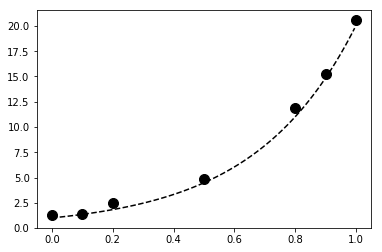

In [98]:
plt.figure(figsize=(6,4));
plt.plot(x_tr[:100], y_tr[:100], "--k");
plt.plot(x,y,'ok',ms=10);

In [99]:
reg = lm.LinearRegression()
reg.fit(x[: , np.newaxis],y)
y_lr = reg.predict(x_tr[:,np.newaxis])

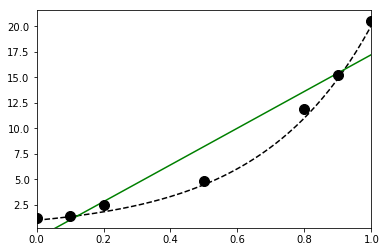

In [108]:
plt.figure(figsize=(6,4));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10)
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);


In [161]:
data, titles = ls.open_csv("bitcoin.csv", delimiter=',')
X=[]
for line in data:
    td=timedelta(days=1)
    dt=datetime.strptime(line[0], "%b %d, %Y")
    dt=dt.toordinal()
    X.append([float(dt)])
Y = [float(x[4]) for x in data]
print (Y[:1])
print (X[:1])
print(len(X))

[2875.34]
[[736541.0]]
1556


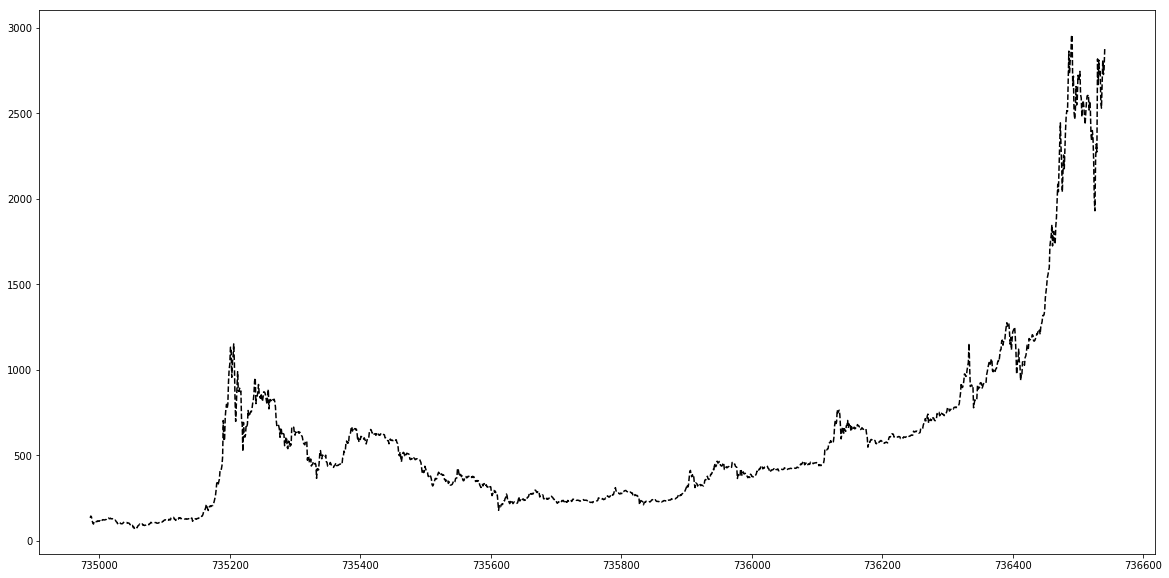

In [162]:
plt.figure(figsize=(20,10))
plt.plot(X,Y, '--k', ms=5)
plt.show()

In [163]:
reg = lm.LinearRegression()
reg.fit(X,Y)
_Y = reg.predict(X)

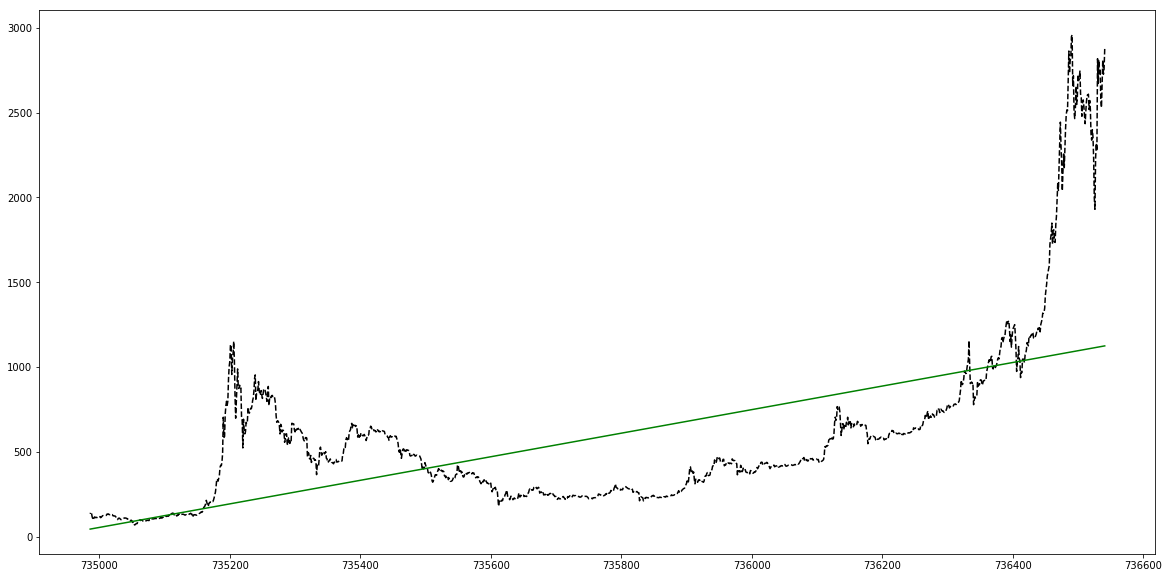

In [156]:
plt.figure(figsize=(20,10))
plt.plot(X,Y, '--k', ms=5)
plt.plot(X,_Y, '-g', ms=5)
plt.show()

In [164]:
_X=preprocessing.normalize(X)
reg = lm.LinearRegression()
reg.fit(_X,Y)
_Y = reg.predict(_X)

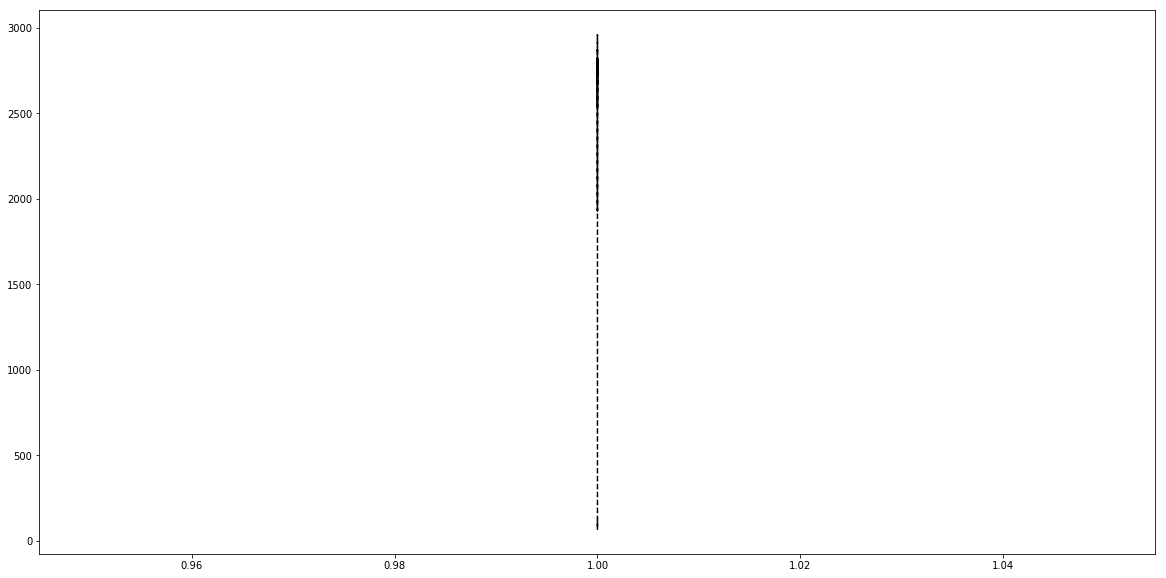

In [165]:
plt.figure(figsize=(20,10))
plt.plot(_X,Y, '--k', ms=5)
plt.plot(_X,_Y, '-g', ms=5)
plt.show()